In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

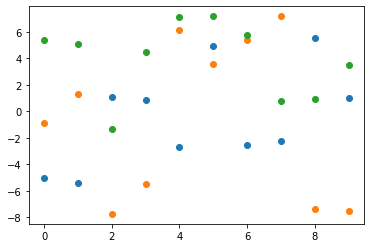

In [23]:
# Given Data
x = np.arange(0,10,1) 
x1_w1 = np.array([-5.01,-5.43,1.08,0.86,-2.67,4.94,-2.51,-2.25,5.56,1.03])
plt.scatter(x,x1_w1);
x1_w2 = np.array([-0.91,1.30,-7.75,-5.47,6.14,3.6,5.37,7.18,-7.39,-7.5])
plt.scatter(x,x1_w2);
x1_w3 = np.array([5.35,5.12,-1.34,4.48,7.11,7.17,5.75,0.77,0.9,3.52])
plt.scatter(x,x1_w3);

In [24]:
## Find mean value for each feature and write mean value vector
m1_w1 = np.mean(x1_w1) 

m1_w2 = np.mean(x1_w2) 

m1_w3 = np.mean(x1_w3) 

## Find covariance matrix for all features

# find out covariance with respect  columns 
cov_mat = x1_w1  
cov_mat1 = np.cov(cov_mat)
# print(cov_mat1) 
cov_mat = x1_w2
cov_mat2 = np.cov(cov_mat)
# print(cov_mat2) 
cov_mat = x1_w3
cov_mat3 = np.cov(cov_mat)
# print(cov_mat2) 

## Given A-prior probabilities
p_w1 = 0.5
p_w2 = 0.5
p_w3 = 0

## Find inverse of covarince matrices for future use
cov_mat1_inv = (cov_mat1)**(-1)
cov_mat2_inv = (cov_mat2)**(-1)
cov_mat3_inv = (cov_mat3)**(-1)

## Functions to calculate Ai, Bi and Cio of discriminant function

def a_mat(cov_matinv):
    return (-0.5)*cov_matinv

def b_mat(mean_mat,cov_matinv):
    return np.dot(mean_mat.T,cov_matinv)

def CIO(mean_mat,cov_matinv,p_w):
    x = (-0.5)*np.dot(np.dot((-0.5)*mean_mat.T,cov_matinv),mean_mat)
    y = (-0.5)*np.log(abs(cov_matinv))
    z = np.log(p_w)
    return x+y+z

## calculate Ai for all classes
a_w1 = a_mat(cov_mat1_inv)
# print(a_w1.shape)
a_w2 = a_mat(cov_mat2_inv)
a_w3 = a_mat(cov_mat3_inv)

## calculate Bi for all classes
b_w1 = b_mat(m1_w1,cov_mat1_inv)
# print(b_w1.shape)
b_w2 = b_mat(m1_w2,cov_mat2_inv)
b_w3 = b_mat(m1_w3,cov_mat3_inv)

## calculate Cio for all classes
cio_w1 = CIO(m1_w1,cov_mat1_inv,p_w1)
# print(cio_w1.shape)
cio_w2 = CIO(m1_w2,cov_mat2_inv,p_w2)
cio_w3 = CIO(m1_w3,cov_mat3_inv,p_w3)


<ipython-input-24-3a01e9e4c805>:42: RuntimeWarning: divide by zero encountered in log
  z = np.log(p_w)


In [25]:
def discriminator(A,B,cio,X):
    x = (-0.5)*np.dot(np.dot(X.T,A),X)
    y = np.dot(B,X)
    z = cio
    return x+y+z
x_test = np.array([5])
g1 = discriminator(a_w1,b_w1,cio_w1,x_test)
print(g1)
g2 = discriminator(a_w2,b_w2,cio_w2,x_test)
print(g2)
g3 = discriminator(a_w3,b_w3,cio_w3,x_test)
print(g3)

## Classifier
if g1>g2 and g1>g3:
    print('This pattern belongs to class g1')
elif g2>g1 and g2>g3:
    print('This pattern belongs to class g2')
else:
    print('This pattern belongs to class g3')

[0.92478659]
[1.20798488]
[-inf]
This pattern belongs to class g2
